# CURADURÍA

# Primer dataset: delitos en CABA, 2023

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn.objects as so
!curl -OL https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-justicia-y-seguridad/delitos/delitos_2023.xlsx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.1M  100 12.1M    0     0   479k      0  0:00:26  0:00:26 --:--:--  528k


In [ ]:
df = pd.read_excel('delitos_2023.xlsx')
df.head()


id-sum  anio    mes  dia      fecha  franja      tipo  \
0       1  2023  enero  LUN 2023-01-02      19  Vialidad   
1       2  2023  enero  MIE 2023-01-11      11  Vialidad   
2       3  2023  enero  VIE 2023-01-13       4  Vialidad   
3       4  2023  enero  VIE 2023-01-13       6  Vialidad   
4       5  2023  enero  VIE 2023-01-13       6  Vialidad   

                         subtipo uso_arma uso_moto            barrio comuna  \
0  Muertes por siniestros viales       NO       NO          BELGRANO     13   
1  Muertes por siniestros viales       NO       NO      VILLA LUGANO      8   
2  Muertes por siniestros viales       NO       NO          SAAVEDRA     12   
3  Muertes por siniestros viales       NO       NO  PARQUE CHACABUCO      7   
4  Muertes por siniestros viales       NO       NO  PARQUE CHACABUCO      7   

     latitud   longitud  cantidad  
0  -58445747  -34559570         1  
1  -58476557  -34673096         1  
2  -58485670  -34544011         1  
3  -58451874  -34636364         1  
4  -58451874  -34636364         1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157461 entries, 0 to 157460
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id-sum    157461 non-null  int64         
 1   anio      157461 non-null  int64         
 2   mes       157461 non-null  object        
 3   dia       157461 non-null  object        
 4   fecha     157461 non-null  datetime64[ns]
 5   franja    157461 non-null  int64         
 6   tipo      157461 non-null  object        
 7   subtipo   157461 non-null  object        
 8   uso_arma  157461 non-null  object        
 9   uso_moto  157461 non-null  object        
 10  barrio    156779 non-null  object        
 11  comuna    156795 non-null  object        
 12  latitud   154642 non-null  object        
 13  longitud  154642 non-null  object        
 14  cantidad  157461 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(10)
memory usage: 18.0+ MB


In [ ]:
import re
df=df.dropna()
#Escribimos esta función para quedarnos con la única parte relevante de los valores únicos anteriores: el número. No separamos por "norte" o "sur"
def extraer_numero(valor):
    if isinstance(valor, int):
        return valor #Los que ya son números los dejo así
    match = re.search(r'\d+', str(valor))  # convierto en string al valor y extraigo los dígitos numéricos
    return int(match.group(0))

df['comuna'] = df['comuna'].apply(extraer_numero)

In [ ]:
df['comuna'].unique() #Chequeamos que funcione

array([13,  8, 12,  7,  3,  2, 10,  4, 15,  9, 14,  1, 11,  5,  6])

In [ ]:
df.drop(columns='id-sum', inplace=True)

In [ ]:
#Vemos los valores únicos de cada columna para ver qué hace falta limpiar
for columna in df.columns:
    valores_unicos = df[columna].unique()
    print(f"Columna '{columna}': {valores_unicos}")

Columna 'anio': [2023]
Columna 'mes': ['enero' 'febrero' 'marzo' 'abril' 'mayo' 'junio' 'julio' 'agosto'
 'septiembre' 'octubre' 'diciembre' 'noviembre']
Columna 'dia': ['LUN' 'MIE' 'VIE' 'MAR' 'JUE' 'DOM' 'SAB']
Columna 'fecha': <DatetimeArray>
['2023-01-02 00:00:00', '2023-01-11 00:00:00', '2023-01-13 00:00:00',
 '2023-01-24 00:00:00', '2023-02-02 00:00:00', '2023-02-05 00:00:00',
 '2023-02-08 00:00:00', '2023-02-17 00:00:00', '2023-02-22 00:00:00',
 '2023-02-26 00:00:00',
 ...
 '2023-12-13 00:00:00', '2023-12-06 00:00:00', '2023-12-10 00:00:00',
 '2023-10-29 00:00:00', '2023-11-02 00:00:00', '2023-12-20 00:00:00',
 '2023-11-14 00:00:00', '2023-11-20 00:00:00', '2023-12-25 00:00:00',
 '2023-12-17 00:00:00']
Length: 365, dtype: datetime64[ns]
Columna 'franja': [19 11  4  6  9 22 18 14 16  5 13  3  2 15  7 12 23 17  8 10  1  0 21 20]
Columna 'tipo': ['Vialidad' 'Lesiones' 'Amenazas' 'Hurto' 'Robo' 'Homicidios']
Columna 'subtipo': ['Muertes por siniestros viales' 'Lesiones por siniestro

In [ ]:
#Unifico valores
correcciones = {
    'NUÑEZ': 'NUNEZ',
    'VILLA GENERAL MITRE': 'VILLA GRAL. MITRE',
    'VILLA ´PUEYRREDON': 'VILLA PUEYRREDON',
    'BOCA': 'LA BOCA',
    0: 'NO ESPECIFICADA',
}
#Lo escribo como función para utilizar el apply
def limpiar_barrio(valor):
    if isinstance(valor, str):
        valor = valor.upper() #Lo guardo en mayúscula para que apliquen las correccioines
    return correcciones.get(valor, valor)


df['barrio'] = df['barrio'].apply(limpiar_barrio)

# Elimino del análisis las filas con barrio no especificado
df = df[df['barrio'] != 'NO ESPECIFICADA']

In [ ]:
df.drop(columns='cantidad', inplace=True) #Este valor siempre es 1, no me brinda información

In [ ]:
#Limpio los valores de latitud y longitud
def limpiar_coordenadas(valor):

    valor = str(valor)
    valor = valor.strip("'")#sacar las comillas

    if ',' in valor: #para los que tienen coma
        valor = re.sub(r',', '', valor)  # le saco todas y las posiciono después de los primeros dos dígitos. Esto porque al ser en Buenos Aires ( que tiene centro en LAT -34.6037,#LONG: -58.3816) sabemos que no habrá datos válidos menores a dos dígitos
        valor = valor[:3] + '.' + valor[3:]

    elif re.match(r'-?\d{3,}', valor): #a los que no tienen coma les pongo una luego de los dos dígitos
        valor = valor[:3] + '.' + valor[3:]

    return float(valor) #quiero trabajar con floats

df['latitud'] = df['latitud'].apply(limpiar_coordenadas)
df['longitud'] = df['longitud'].apply(limpiar_coordenadas)

In [ ]:
df['latitud'].unique() #chequeo

array([-58.445747 , -58.476557 , -58.48567  , ..., -34.58912  ,
       -34.5835139, -34.64838  ])

In [ ]:
df.drop(columns='anio', inplace=True) #lo tiro porque es todo de 2023

In [ ]:
df = df.rename(columns={'franja': 'hora'})

In [ ]:
df['mes'] = pd.Categorical(df['mes'], categories=['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'], ordered=True)

In [ ]:
df['dia'] = pd.Categorical(df['dia'], categories=['LUN', 'MAR', 'MIE', 'JUE', 'VIE', 'SAB', 'DOM'], ordered=True)

In [ ]:
df_delitos=df

# Segundo dataset: locales bailables en CABA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!curl -OL https://cdn.buenosaires.gob.ar/datosabiertos/datasets/agencia-gubernamental-de-control/locales-bailables/locales_bailables.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23045  100 23045    0     0  27677      0 --:--:-- --:--:-- --:--:-- 27665


In [ ]:
df = pd.read_csv('locales_bailables.csv',sep = ';',encoding='cp1252',usecols=range(16))
df.drop(columns=['Nº Expte','Clase','Disp nº2','Fecha Disp. Re-Inscripción','Disp. de rechazo nº ','fecha disposición de rechazo','Disposición de recalculo capacidad nº', 'Fecha disposición de  capacidad'], inplace=True)

In [ ]:
df[df['NOMBRE']== 'VIRUS 10,1']

Nº             REG      NOMBRE  DOMICILIO    nº     Capacidad  \
69                70.0  VIRUS 10,1  RIVADAVIA  7523  216 personas   

           Estado  Disp nº Fecha Disp. Inscripción  
69  RENOVADO 2023     12.0              2006-02-21

In [ ]:
df.columns

Index(['Nº             REG', 'NOMBRE', 'DOMICILIO', 'nº', 'Capacidad',
       'Estado', 'Disp nº', 'Fecha Disp. Inscripción'],
      dtype='object')

Las únicas categorías que nos interesarían son los Renovados este año o el año pasado y los inscritos el año pasado. Vamos a suponer que los únicos abiertos son los habilitados (por ahora)

In [ ]:
df['Estado'].value_counts()

Estado
RENOVADO 2023                             59
INSCRIPCION VENCIDA                       46
RENOVADO 2024                             10
INSCRIPCIÓN VENCIDA                        3
BAJA DE INSCRIPCION                        2
SUSPENDIDO                                 2
INSCRPCION VENCIDA                         2
BAJA INSCRIPCION  DISFC-2024-2-DGFYC       1
BAJA INSC: Disp\n. Nº 002/2010             1
BAJA INSC: DISFC-2018-108-DGFYC            1
BAJA INSC: DISP. N° 113/12                 1
BAJA INSC: Disp.\n Nº 003/2010             1
BAJA INSCRIPCION DISP Nº 88/16             1
BAJA INSCRIPCION DISP Nº 64/2013           1
BAJA DE INSCRIPCION DISP Nº70/14.          1
INSCRPCIÓN VENCIDA                         1
BAJA INSCRIPCION DISP. Nº 65/2013          1
 INSCRIPCION VENCIDA                       1
BAJA PREVENTIVA POR DISFC Nº107/16         1
BAJA PROVISORIA                            1
BAJA INSCRIPCION                           1
BAJA INSCRIPCION POR DISFC Nº 06/18        1
BAJA INSCRIPCION DISP Nº 03/16.            1
DENEGATORIA RENOVACION DISFC Nº 108/17     1
BAJA INSCRIPCION DISP. Nº 05/10            1
BAJA  INSC: Disp. \nConjunta 92/2010       1
BAJA INSCRPICION: DISFC-2015-80-DGFYC      1
BAJA INSC. Disp. \n44/2008 conjunta        1
SUSPENDIDO Disp.\n108/09 conjunta          1
INSCRIPCION VENCIDA 7/03/2019              1
BAJA INSC.Disp. \n02/14 conjunta           1
SUSPENDIDO DISFC-2023-27-GCABA-DGFYC       1
BAJA INSC. Disp.40/13                      1
BAJA INSC.Disp. \n77/2008 conjunta         1
BAJA INSC:Disp. \nConjunta N° 007/2010     1
RENOVADO 2020                              1
BAJA INSCRIPCION DISFC-2024-3-DGFYC        1
SUSPENDIDO DISFC-2016-58-DGFYC             1
BAJA INSC: Disp. \nConjunta N°47/2010      1
BAJA INSC: Disp. Conjunta N° 74/11         1
BAJA INSCRPICION:DISFC-2015-55-DGFYC       1
SUSPENDIDO Disp. Nº \n26/DGHP/08           1
BAJA INSCRIPCION DISFC-2013-127-DGFYC      1
BAJA INSC: Disp N°94/12                    1
BAJA INSC: Disp. \nNº 30/DGHP/2008         1
SUSPENDIDO DISFC-2016-77-DGFYC             1
INSCRIPCION 2024                           1
Name: count, dtype: int64

Chequeamos que los renovados 2024 sean previos al 2023

In [ ]:
df[df['Estado']=='RENOVADO 2024']

Nº             REG           NOMBRE           DOMICILIO       nº  \
2                   3.0       REY CASTRO               PERU       342   
3                   4.0        LA FRANCE          SARMIENTO      1656   
61                 62.0          AMERIKA            GASCON       1036   
86                 87.0             SEU          AV. BOYACA        28   
87                 88.0             KIKA            HONDURAS  5339/47   
104               105.0            INPUT  AV. JUAN B. JUSTO      1658   
135               135.0           FRIDHA         Av. DORREGO   1735/9   
145               145.0        VOLT CLUB         AV. CORDOBA  4175/79   
148               148.0             DOUX         AV. CORDOBA     4119   
163               163.0  TEATRO VORTERIX      AV. F. LACROZE  3453/59   

         Capacidad         Estado  Disp nº Fecha Disp. Inscripción  
2     901 personas  RENOVADO 2024      4.0              2005-03-01  
3    1372 personas  RENOVADO 2024      5.0              2005-03-01  
61   2450 personas  RENOVADO 2024     84.0              2005-07-14  
86    186 personas  RENOVADO 2024     34.0              2007-03-16  
87   1100 personas  RENOVADO 2024     35.0              2007-03-16  
104   742 personas  RENOVADO 2024     53.0              2009-04-24  
135    187personas  RENOVADO 2024    131.0              2012-10-18  
145   350 personas  RENOVADO 2024     63.0              2015-06-19  
148   203 personas  RENOVADO 2024     33.0              2016-03-15  
163   668 personas  RENOVADO 2024      1.0              2022-01-04

Filtramos los datos que no nos sirven

In [ ]:
df_f = df[(df['Estado'] == 'RENOVADO 2023') | (df['Estado'] == 'RENOVADO 2024')]
df_f['Estado'].value_counts()

Estado
RENOVADO 2023    59
RENOVADO 2024    10
Name: count, dtype: int64

Tenemos números de domicilio que tienen dos partes separadas con una barra o un espacio

In [ ]:
df_f['nº'][163]

'3453/59'

In [ ]:
df_f['nº'][163].split('/')

['3453', '59']

In [ ]:
def num(inp):
  if '/' in inp:
    return inp.split('/')[0]
  elif ' ' in inp:
    return inp.split(' ')[0]
  else:
    return inp



In [ ]:
df_f = df_f.copy()
df_f['nº'] = df_f['nº'].astype(str)
df_f['nº'] = df_f['nº'].apply(num)

In [ ]:
df_f['nº'].value_counts()

nº
sin     2
947     2
1775    2
342     1
3241    1
       ..
1391    1
1640    1
3360    1
459     1
3453    1
Name: count, Length: 66, dtype: int64

Ahora arreglo las calles porque tienen un \n cruzado

In [ ]:
def arreglo(inp):
  lista = inp.split('\n')
  if len(lista)>1:
    result = ''.join(lista)
    return result
  else:
    return inp


In [ ]:
df_f['DOMICILIO'] = df_f['DOMICILIO'].transform(arreglo)

In [ ]:
df_f['DOMICILIO'].value_counts()

DOMICILIO
AV. RIVADAVIA              4
AV. RAFAEL OBLIGADO        4
SARMIENTO                  3
AV. CORDOBA                3
R. OBLIGADO Y SARMIENTO    2
HONDURAS                   2
AV. CÓRDOBA                2
AV. JUAN B. JUSTO          2
PERU                       1
SCALABRINI ORTIZ           1
JURAMENTO                  1
AV. HIPOÍLITO IRIGOYEN     1
CHACABUCO                  1
NICETO VEGA                1
AV. HIPÓLITO YRIGOYEN      1
AV. CABILDO                1
AV. SANTA FE               1
AV. SAENZ                  1
SUIPACHA                   1
PERÚ                       1
AV. BEIRO                  1
Av. DORREGO                1
AV. DE MAYO                1
URIBURU                    1
SUCRE                      1
JUNIN                      1
AV.RAFAEL OBLIGADO         1
AV. NICETO VEGA            1
AV. BOYACA                 1
J.L. BORGES                1
GUARDIA VIEJA              1
RIVADAVIA                  1
LAVALLE                    1
AV SAN M ARTÍN             1
BALCARCE                   1
ALSINA                     1
NICETO VEGA                1
PIERINA DEALESSI           1
JOSÉ A. CABREREA           1
JOSÉ MARTÍ                 1
OLLEROS                    1
ECUADOR                    1
R. OBLIGADO Y SALGUERO     1
AZCUENAGA                  1
ARAOZ                      1
AV. RIVADAVIA              1
RODRIGUEZ PEÑA             1
O`BRIEN                    1
GASCON                     1
AGÜERO                     1
RIVADAVIA                  1
AV. LIBERTADOR             1
A.  MOREAU DE JUSTO        1
AV. ALVAREZ THOMAS         1
AV. F. LACROZE             1
Name: count, dtype: int64

Hay un domicilio que es AV SAN M ARTIN, es solo uno así que lo arreglo a mano

Creo, CREO, que ahora está limpito como para arrancar a localizar boliches.
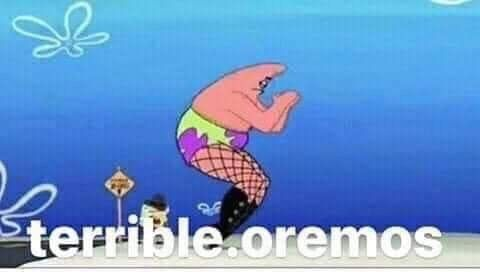

Primero me fijo cuantos de los boliches no tienen numeración

In [ ]:
df_f['nº'].unique()

array(['342', '1656', '343', '1728', '6628', '1752', '678', '634', '934',
       '5508', '740', '3046', '17', '1775', '60', '7802', 'sin', '2422',
       '3469', '1220', '1232', '1036', '445', '1908', '7523', '3883',
       '10925', '2092', '1391', '1640', '3360', '459', '28', '5339',
       '1425', '1531', '968', '543', '947', '5681', '1658', '6211',
       '4389', 'nan', '3241', '586', '529', '3334', '1735', '948', '7927',
       '1073', '4175', '5450', '4119', '4801', '646', '1787', '1221',
       '1579', '10919', '6201', '5208', '6151', '5534', '3453'],
      dtype=object)

In [ ]:
df_f[df_f['nº'] == 'sin']

Nº             REG     NOMBRE                DOMICILIO   nº  \
37                38.0       CAIX   R. OBLIGADO Y SALGUERO  sin   
43                44.0  MANDARINE  R. OBLIGADO Y SARMIENTO  sin   

        Capacidad         Estado  Disp nº Fecha Disp. Inscripción  
37  1764 personas  RENOVADO 2023     41.0              2005-03-18  
43  1613 personas  RENOVADO 2023     47.0              2005-03-23

In [ ]:
df_f[df_f['nº'] == 'nan']

Nº             REG               NOMBRE                DOMICILIO   nº  \
119               120.0  TERRAZAS \nDEL ESTE  R. OBLIGADO Y SARMIENTO  nan   

         Capacidad         Estado  Disp nº Fecha Disp. Inscripción  
119  3095 personas  RENOVADO 2023     10.0              2011-02-10

Los tres son en costanera jajan't. Los podemos agregar a mano después cuando ya tengamos los demás en long y lat. O los eliminamos, también es una posibilidad


In [ ]:
df_f = df_f[df_f['nº'] != 'sin']
df_f = df_f[df_f['nº'] != 'nan']

In [ ]:
df_f['nº'].unique()

array(['342', '1656', '343', '1728', '6628', '1752', '678', '634', '934',
       '5508', '740', '3046', '17', '1775', '60', '7802', '2422', '3469',
       '1220', '1232', '1036', '445', '1908', '7523', '3883', '10925',
       '2092', '1391', '1640', '3360', '459', '28', '5339', '1425',
       '1531', '968', '543', '947', '5681', '1658', '6211', '4389',
       '3241', '586', '529', '3334', '1735', '948', '7927', '1073',
       '4175', '5450', '4119', '4801', '646', '1787', '1221', '1579',
       '10919', '6201', '5208', '6151', '5534', '3453'], dtype=object)

In [ ]:
df_f.head()

Nº             REG       NOMBRE        DOMICILIO    nº      Capacidad  \
2                  3.0   REY CASTRO            PERU    342   901 personas   
3                  4.0    LA FRANCE       SARMIENTO   1656  1372 personas   
4                  5.0          XSS         LAVALLE    343   880 personas   
9                 10.0  WAK- MALUCO       SARMIENTO   1728  1076 personas   
10                11.0     XEL - HA  AV SAN M ARTÍN   6628   692 personas   

           Estado  Disp nº Fecha Disp. Inscripción  
2   RENOVADO 2024      4.0              2005-03-01  
3   RENOVADO 2024      5.0              2005-03-01  
4   RENOVADO 2023      6.0              2005-03-01  
9   RENOVADO 2023     11.0              2005-03-03  
10  RENOVADO 2023     12.0              2005-03-03

Había algunas calles que las tomaba mal por estar o mal escritas o abreviadas. las arreglo

In [ ]:
df_f['DOMICILIO'] = df_f['DOMICILIO'].str.replace(r'\bJOSÉ A. CABREREA\b', 'JOSE CABRERA', regex=True)
df_f['DOMICILIO'] = df_f['DOMICILIO'].str.replace(r'\bAV. HIPOÍLITO IRIGOYEN\b', 'AV. HIPOLITO YRIGOYEN', regex=True)
df_f['DOMICILIO'] = df_f['DOMICILIO'].str.replace(r'\bAV. F. LACROZE\b', 'AV. FEDERICO LACROZE', regex=True)
df_f['DOMICILIO'] = df_f['DOMICILIO'].str.replace(r'\bURIBURU\b', 'JOSE EVARISTO URIBURU', regex=True)
df_f['DOMICILIO'] = df_f['DOMICILIO'].str.replace(r'A.  MOREAU DE JUSTO', 'AV. ALICIA MOREAU DE JUSTO', regex=True)
df_f['DOMICILIO'] = df_f['DOMICILIO'].str.replace(r'\bAV. JUAN B. JUSTO\b', 'AV. JUAN BAUTISTA JUSTO', regex=True)
df_f['DOMICILIO'] = df_f['DOMICILIO'].str.replace(r'\bJ.L. BORGES\b', 'JORGE LUIS BORGES', regex=True)
df_f['DOMICILIO'] = df_f['DOMICILIO'].str.replace(r'\bAV SAN M ARTÍN\b', 'AV SAN MARTIN', regex=True)

In [ ]:
df_f['DIRECCION'] = df_f['DOMICILIO']+' '+df_f['nº']+', Ciudad de Buenos Aires, Argentina'

In [ ]:
df_f.head()

Nº             REG       NOMBRE       DOMICILIO    nº      Capacidad  \
2                  3.0   REY CASTRO           PERU    342   901 personas   
3                  4.0    LA FRANCE      SARMIENTO   1656  1372 personas   
4                  5.0          XSS        LAVALLE    343   880 personas   
9                 10.0  WAK- MALUCO      SARMIENTO   1728  1076 personas   
10                11.0     XEL - HA  AV SAN MARTIN   6628   692 personas   

           Estado  Disp nº Fecha Disp. Inscripción  \
2   RENOVADO 2024      4.0              2005-03-01   
3   RENOVADO 2024      5.0              2005-03-01   
4   RENOVADO 2023      6.0              2005-03-01   
9   RENOVADO 2023     11.0              2005-03-03   
10  RENOVADO 2023     12.0              2005-03-03   

                                            DIRECCION  
2        PERU  342, Ciudad de Buenos Aires, Argentina  
3   SARMIENTO  1656, Ciudad de Buenos Aires, Argen...  
4     LAVALLE  343, Ciudad de Buenos Aires, Argentina  
9   SARMIENTO  1728, Ciudad de Buenos Aires, Argen...  
10  AV SAN MARTIN  6628, Ciudad de Buenos Aires, A...

Me salióoooooooooooooooooo


In [ ]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import pandas as pd
import time

# Inicializa el geolocalizador
geolocator = Nominatim(user_agent="myGeocoder")

def geolocator_df(inp):
    try:
        ubicacion = geolocator.geocode(inp, timeout=10)
        if ubicacion:
            return ubicacion.latitude, ubicacion.longitude
        else:
            return None, None  # Si no se encuentra la ubicación
    except GeocoderTimedOut:
        print(f"Timeout para la ubicación: {inp}")
        return None, None



# Agregar columnas de latitud y longitud
df_f[['Latitud', 'Longitud']] = df_f['DIRECCION'].apply(lambda x: pd.Series(geolocator_df(x)))

df_f.head()


Nº             REG       NOMBRE       DOMICILIO    nº      Capacidad  \
2                  3.0   REY CASTRO           PERU    342   901 personas   
3                  4.0    LA FRANCE      SARMIENTO   1656  1372 personas   
4                  5.0          XSS        LAVALLE    343   880 personas   
9                 10.0  WAK- MALUCO      SARMIENTO   1728  1076 personas   
10                11.0     XEL - HA  AV SAN MARTIN   6628   692 personas   

           Estado  Disp nº Fecha Disp. Inscripción  \
2   RENOVADO 2024      4.0              2005-03-01   
3   RENOVADO 2024      5.0              2005-03-01   
4   RENOVADO 2023      6.0              2005-03-01   
9   RENOVADO 2023     11.0              2005-03-03   
10  RENOVADO 2023     12.0              2005-03-03   

                                            DIRECCION    Latitud   Longitud  
2        PERU  342, Ciudad de Buenos Aires, Argentina -34.611910 -58.374700  
3   SARMIENTO  1656, Ciudad de Buenos Aires, Argen... -34.605556 -58.390093  
4     LAVALLE  343, Ciudad de Buenos Aires, Argentina -34.601935 -58.371785  
9   SARMIENTO  1728, Ciudad de Buenos Aires, Argen... -34.605631 -58.391192  
10  AV SAN MARTIN  6628, Ciudad de Buenos Aires, A... -34.592958 -58.507908

In [ ]:
df_f[pd.isna(df_f['Latitud'])]

Empty DataFrame
Columns: [Nº             REG, NOMBRE, DOMICILIO, nº, Capacidad, Estado, Disp nº, Fecha Disp. Inscripción, DIRECCION, Latitud, Longitud]
Index: []

In [ ]:
#esta celda la uso para chequear direcciones particulares, no es lo importante
from geopy.geocoders import Nominatim

# Crear el geocodificador
geolocator = Nominatim(user_agent="lara_barreiro")

# Dirección específica
direccion = "AV. RAFAEL OBLIGADO 6201, Ciudad de Buenos Aires, Argentina"

# Obtener la localización
ubicacion = geolocator.geocode(direccion)

# Imprimir las coordenadas
if ubicacion:
    print(f"Dirección: {direccion}")
    print(f"Latitud: {ubicacion.latitude}")
    print(f"Longitud: {ubicacion.longitude}")
else:
    print("No se pudo encontrar la ubicación.")

Dirección: AV. RAFAEL OBLIGADO 6201, Ciudad de Buenos Aires, Argentina
Latitud: -34.5566235
Longitud: -58.41207165


In [ ]:
# Aparecían en frente de aeroparque
df_f.loc[df_f['NOMBRE'] == 'BNN', 'Latitud'] = -34.54954385223454
df_f.loc[df_f['NOMBRE'] == 'BNN', 'Longitud'] = -58.42974571323707
df_f.loc[df_f['NOMBRE'] == 'JET', 'Latitud'] = -34.551970217863065
df_f.loc[df_f['NOMBRE'] == 'JET', 'Longitud'] = -58.42596227116435

Hacemos un mapa interactivo de la localización de los boliches

In [ ]:
import folium
from folium.plugins import HeatMap

# Crear un mapa centrado en Buenos Aires
mapa_buenos_aires = folium.Map(location=[-34.6037, -58.3816], zoom_start=12)

# Extraer coordenadas y datos adicionales del DataFrame
# En este caso, 'NOMBRE' es la columna con información adicional
coordenadas = df_f[['Latitud', 'Longitud']].values.tolist()
nombres = df_f['NOMBRE'].tolist()

# Agregar HeatMap con las coordenadas
HeatMap(coordenadas).add_to(mapa_buenos_aires)

# Agregar marcadores individuales con información adicional
for coord, nombre in zip(coordenadas, nombres):
    folium.Marker(
        location=coord,
        popup=folium.Popup(nombre, max_width=200),
        tooltip="Click para ver el nombre"
    ).add_to(mapa_buenos_aires)

# Mostrar el mapa
mapa_buenos_aires


In [ ]:
import requests
import zipfile
import os
import geopandas as gpd
import matplotlib.pyplot as plt
# URL del shapefile de barrios
url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.zip"

# Nombre del archivo ZIP y carpeta de extracción
zip_file_path = "barrios_buenos_aires.zip"
extracted_folder = "barrios_buenos_aires"

# Descargar el archivo ZIP
response = requests.get(url)
with open(zip_file_path, "wb") as f:
    f.write(response.content)
print(f"Archivo descargado: {zip_file_path}")

# Descomprimir el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)
print(f"Archivos descomprimidos en: {extracted_folder}")

# Ruta del shapefile
shapefile_path = os.path.join(extracted_folder, "barrios.shp")

# Leer el shapefile con GeoPandas
barrios_caba = gpd.read_file(shapefile_path)



Archivo descargado: barrios_buenos_aires.zip
Archivos descomprimidos en: barrios_buenos_aires


In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Example DataFrame with latitude and longitude
data = df_f[['Latitud', 'Longitud']]
locations = pd.DataFrame(data)

# Convert latitude and longitude to Point objects
geometry = [Point(xy) for xy in zip(locations['Longitud'], locations['Latitud'])]
locations_gdf = gpd.GeoDataFrame(locations, geometry=geometry, crs="EPSG:4326")

# Ensure both GeoDataFrames use the same CRS
barrios_caba = barrios_caba.to_crs("EPSG:4326")

# Perform a spatial join
locations_with_barrios = gpd.sjoin(locations_gdf, barrios_caba, how="left", predicate="within")


In [ ]:
df_f['BARRIO'] = locations_with_barrios['nombre']

In [ ]:
df_f.head()

Nº             REG       NOMBRE       DOMICILIO    nº      Capacidad  \
2                  3.0   REY CASTRO           PERU    342   901 personas   
3                  4.0    LA FRANCE      SARMIENTO   1656  1372 personas   
4                  5.0          XSS        LAVALLE    343   880 personas   
9                 10.0  WAK- MALUCO      SARMIENTO   1728  1076 personas   
10                11.0     XEL - HA  AV SAN MARTIN   6628   692 personas   

           Estado  Disp nº Fecha Disp. Inscripción  \
2   RENOVADO 2024      4.0              2005-03-01   
3   RENOVADO 2024      5.0              2005-03-01   
4   RENOVADO 2023      6.0              2005-03-01   
9   RENOVADO 2023     11.0              2005-03-03   
10  RENOVADO 2023     12.0              2005-03-03   

                                            DIRECCION    Latitud   Longitud  \
2        PERU  342, Ciudad de Buenos Aires, Argentina -34.611910 -58.374700   
3   SARMIENTO  1656, Ciudad de Buenos Aires, Argen... -34.605556 -58.390093   
4     LAVALLE  343, Ciudad de Buenos Aires, Argentina -34.601935 -58.371785   
9   SARMIENTO  1728, Ciudad de Buenos Aires, Argen... -34.605631 -58.391192   
10  AV SAN MARTIN  6628, Ciudad de Buenos Aires, A... -34.592958 -58.507908   

          BARRIO  
2      MONSERRAT  
3    SAN NICOLAS  
4    SAN NICOLAS  
9    SAN NICOLAS  
10  VILLA DEVOTO

In [ ]:
df_f[pd.isna(df_f['BARRIO'])]

Nº             REG NOMBRE            DOMICILIO    nº     Capacidad  \
150               150.0    JET  AV. RAFAEL OBLIGADO  4801  602 personas   

            Estado  Disp nº Fecha Disp. Inscripción  \
150  RENOVADO 2023     96.0              2016-10-07   

                                             DIRECCION   Latitud   Longitud  \
150  AV. RAFAEL OBLIGADO 4801, Ciudad de Buenos Air... -34.55197 -58.425962   

    BARRIO  
150    NaN

In [ ]:
df_f['NOMBRE'].unique()

array(['REY CASTRO', 'LA FRANCE', 'XSS', 'WAK- MALUCO', 'XEL - HA',
       'SUDACA', 'MOLIERE', 'GONG', 'PALACIO ALSINA', 'NICETO CLUB ',
       'CHANA CLUB', 'GLAM ', 'TABASCO', 'FRERE', 'LATINO 11',
       'TEATRO FLORES', 'CLUB ARÁOZ', 'MAZA CLUB', 'THE SHAMROCK',
       'RADIO STUDIO', 'AMERIKA', 'THE FLOWER', 'LA PEÑA', 'VIRUS 10,1',
       'CROBAR', 'MÁGICO', 'DORSIA', 'LA CITY', 'BRUJAS', 'RUANO',
       'UNI CLUB', 'ARENA SUR', 'SEU ', 'KIKA', 'PORTO SOHO', 'VIPER',
       'VOX', 'THE SUB', 'CLUB 947', 'BLOW', 'INPUT', 'CIRCUS', 'TEQUILA',
       'GROOVE', 'VELVET', 'YOUR CLUB', 'MUSEUM', 'ONE MORE CLUB',
       'FRIDHA', 'LP', 'ECLIPTICO', 'KUMA ', 'VOLT CLUB', 'BO- BO',
       'DOUX', 'JET', 'ZEGRE', 'AFRIKA', 'ROSE IN RIO/BALI', 'BEE',
       'EQUINOXIO', 'BNN', 'HOOD JUANA', 'MOSCU', 'MOLY',
       'TEATRO VORTERIX'], dtype=object)

In [ ]:
df_f['BARRIO'].value_counts()

BARRIO
PALERMO             17
MONSERRAT            7
SAN NICOLAS          6
RECOLETA             5
BELGRANO             5
BALVANERA            4
FLORES               3
PUERTO MADERO        2
FLORESTA             2
ALMAGRO              2
LINIERS              2
SAN TELMO            1
VILLA CRESPO         1
VILLA DEL PARQUE     1
NUÑEZ                1
CONSTITUCION         1
RETIRO               1
NUEVA POMPEYA        1
VILLA ORTUZAR        1
VILLA DEVOTO         1
COLEGIALES           1
Name: count, dtype: int64

ELimino al boliche JET

In [ ]:
df_f = df_f[df_f['NOMBRE']!='JET']

In [ ]:
url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/comunas/comunas.zip"

zip_file_path = "comunas_buenos_aires.zip"
extracted_folder = "comunas_buenos_aires"

#Descargar
response = requests.get(url)
with open(zip_file_path, "wb") as f:
    f.write(response.content)
print(f"Archivo descargado: {zip_file_path}")
#Descomprimir
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)
print(f"Archivos descomprimidos en: {extracted_folder}")

shapefile_path = os.path.join(extracted_folder, "comunas.shp")

#Cargar el shapefile
gdf = gpd.read_file(shapefile_path)

Archivo descargado: comunas_buenos_aires.zip
Archivos descomprimidos en: comunas_buenos_aires


In [ ]:
gdf['barrios']

0     CONSTITUCION, MONSERRAT, RETIRO, PUERTO MADERO...
1                                              RECOLETA
2                              SAN CRISTOBAL, BALVANERA
3       BARRACAS, BOCA, PARQUE PATRICIOS, NUEVA POMPEYA
4                                        ALMAGRO, BOEDO
5                                             CABALLITO
6                              FLORES, PARQUE CHACABUCO
7          VILLA LUGANO, VILLA RIACHUELO, VILLA SOLDATI
8                 PARQUE AVELLANEDA, MATADEROS, LINIERS
9     FLORESTA, MONTE CASTRO, VELEZ SARSFIELD, VERSA...
10    VILLA DEL PARQUE, VILLA DEVOTO, VILLA GRAL. MI...
11    VILLA URQUIZA, VILLA PUEYRREDON, SAAVEDRA, COG...
12                          BELGRANO, NUÑEZ, COLEGIALES
13                                              PALERMO
14    AGRONOMIA, PATERNAL, PARQUE CHAS, CHACARITA, V...
Name: barrios, dtype: object

In [ ]:
def comuna(inp):

    for i in range(len(gdf['barrios'])):
        l = gdf['barrios'][i].split(',')

        for j in range(len(l)):
          if inp in l[j]:

            return i + 1

In [ ]:
df_f['COMUNA'] = df_f['BARRIO'].apply(comuna)

In [ ]:
df_f['COMUNA'].value_counts()

COMUNA
1     18
14    17
13     7
2      5
3      4
7      3
11     2
10     2
5      2
9      2
15     2
4      1
Name: count, dtype: int64

In [ ]:
df_f.head()

Nº             REG       NOMBRE       DOMICILIO    nº      Capacidad  \
2                  3.0   REY CASTRO           PERU    342   901 personas   
3                  4.0    LA FRANCE      SARMIENTO   1656  1372 personas   
4                  5.0          XSS        LAVALLE    343   880 personas   
9                 10.0  WAK- MALUCO      SARMIENTO   1728  1076 personas   
10                11.0     XEL - HA  AV SAN MARTIN   6628   692 personas   

           Estado  Disp nº Fecha Disp. Inscripción  \
2   RENOVADO 2024      4.0              2005-03-01   
3   RENOVADO 2024      5.0              2005-03-01   
4   RENOVADO 2023      6.0              2005-03-01   
9   RENOVADO 2023     11.0              2005-03-03   
10  RENOVADO 2023     12.0              2005-03-03   

                                            DIRECCION    Latitud   Longitud  \
2        PERU  342, Ciudad de Buenos Aires, Argentina -34.611910 -58.374700   
3   SARMIENTO  1656, Ciudad de Buenos Aires, Argen... -34.605556 -58.390093   
4     LAVALLE  343, Ciudad de Buenos Aires, Argentina -34.601935 -58.371785   
9   SARMIENTO  1728, Ciudad de Buenos Aires, Argen... -34.605631 -58.391192   
10  AV SAN MARTIN  6628, Ciudad de Buenos Aires, A... -34.592958 -58.507908   

          BARRIO  COMUNA  
2      MONSERRAT       1  
3    SAN NICOLAS       1  
4    SAN NICOLAS       1  
9    SAN NICOLAS       1  
10  VILLA DEVOTO      11

In [ ]:
boliches = df_f.copy()
df_f.to_csv('boliches.csv', index=False)

# EXPLORACIÓN DE LOS DATOS

In [ ]:
df=df_delitos
#Miramos densidad de delitos por su posición geográfica
import folium
from folium.plugins import HeatMap
#centrar el mapa en buenos aires
mapa_buenos_aires = folium.Map(location=[-34.6037, -58.3816], zoom_start=12)

# Extraer coordenadas (latitud y longitud) de los eventos del df
coordenadas = df[['latitud', 'longitud']].values.tolist()

# Agrego al heatmap las coordenadas de los delitos registrados
# HeatMap(coordenadas).add_to(mapa_buenos_aires)
HeatMap(coordenadas, radius=15,  max_val=100, blur=15).add_to(mapa_buenos_aires)  # Prueba valores entre 5 y 20
# Mostrar el mapa
mapa_buenos_aires


<ipython-input-139-ee14dc1af1a5>:13: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(coordenadas, radius=15,  max_val=100, blur=15).add_to(mapa_buenos_aires)  # Prueba valores entre 5 y 20


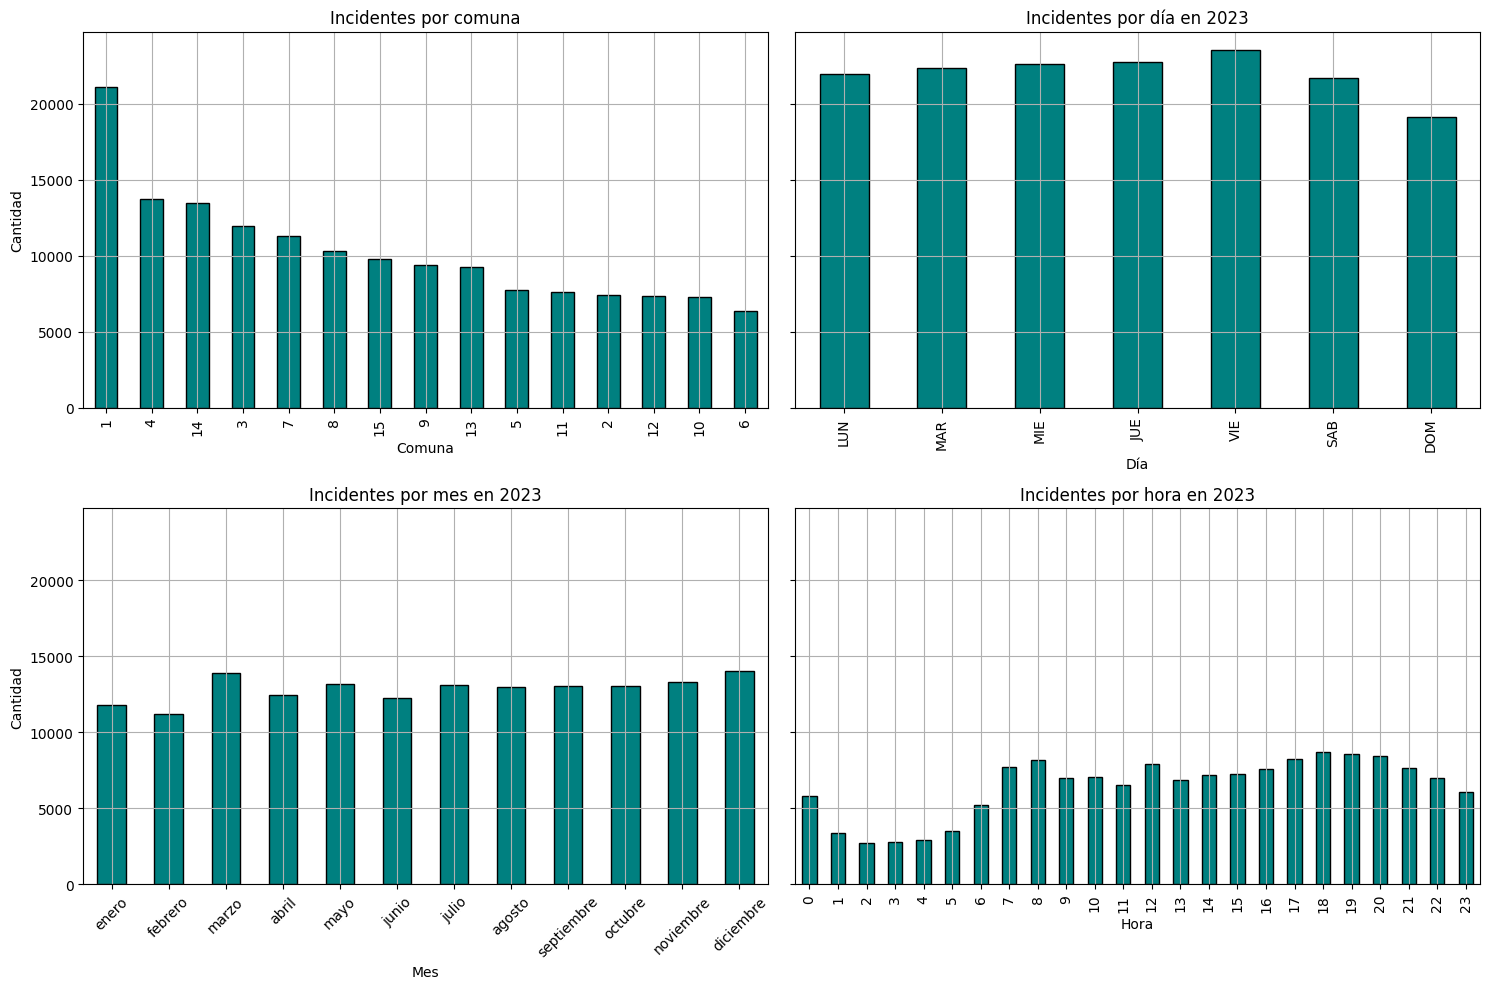

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

df['comuna'].value_counts().plot(kind='bar', color='teal', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Incidentes por comuna')
axes[0, 0].set_xlabel('Comuna')
axes[0, 0].set_ylabel('Cantidad')
axes[0, 0].grid()

df['dia'].value_counts().sort_index().plot(kind='bar', color='teal', edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title('Incidentes por día en 2023')
axes[0, 1].set_xlabel('Día')
axes[0, 1].set_ylabel('Cantidad')
axes[0, 1].grid()

df['mes'].value_counts().sort_index().plot(kind='bar', color='teal', edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('Incidentes por mes en 2023')
axes[1, 0].set_xlabel('Mes')
axes[1, 0].set_ylabel('Cantidad')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].grid()

df['hora'].value_counts().sort_index().plot(kind='bar', color='teal', edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title('Incidentes por hora en 2023')
axes[1, 1].set_xlabel('Hora')
axes[1, 1].set_ylabel('Cantidad')
axes[1, 1].grid()

plt.tight_layout()
plt.show()

In [ ]:
df['uso_arma'].value_counts()

uso_arma
NO    144852
SI      9227
Name: count, dtype: int64

In [ ]:
df['uso_moto'].value_counts()

uso_moto
NO    149645
SI      4434
Name: count, dtype: int64

In [ ]:
df['tipo'].value_counts()

tipo
Robo          64813
Hurto         62389
Lesiones      10128
Vialidad       8694
Amenazas       7973
Homicidios       82
Name: count, dtype: int64

Archivo descargado: comunas_buenos_aires.zip
Archivos descomprimidos en: comunas_buenos_aires
   id  objeto  comuna                                            barrios  \
0   1  COMUNA       1  CONSTITUCION, MONSERRAT, RETIRO, PUERTO MADERO...   
1   2  COMUNA       2                                           RECOLETA   
2   3  COMUNA       3                           SAN CRISTOBAL, BALVANERA   
3   4  COMUNA       4    BARRACAS, BOCA, PARQUE PATRICIOS, NUEVA POMPEYA   
4   5  COMUNA       5                                     ALMAGRO, BOEDO   

   perimetro         area                                           geometry  
0   36011.96  17784744.41  MULTIPOLYGON (((-58.36855 -34.57365, -58.36852...  
1   21450.47   6317725.62  POLYGON ((-58.38001 -34.57002, -58.38003 -34.5...  
2   10486.26   6385991.48  POLYGON ((-58.41192 -34.598, -58.4103 -34.5980...  
3   35474.12  21688665.28  POLYGON ((-58.35521 -34.61943, -58.35514 -34.6...  
4   12323.43   6660603.14  POLYGON ((-58.41287 -34.614

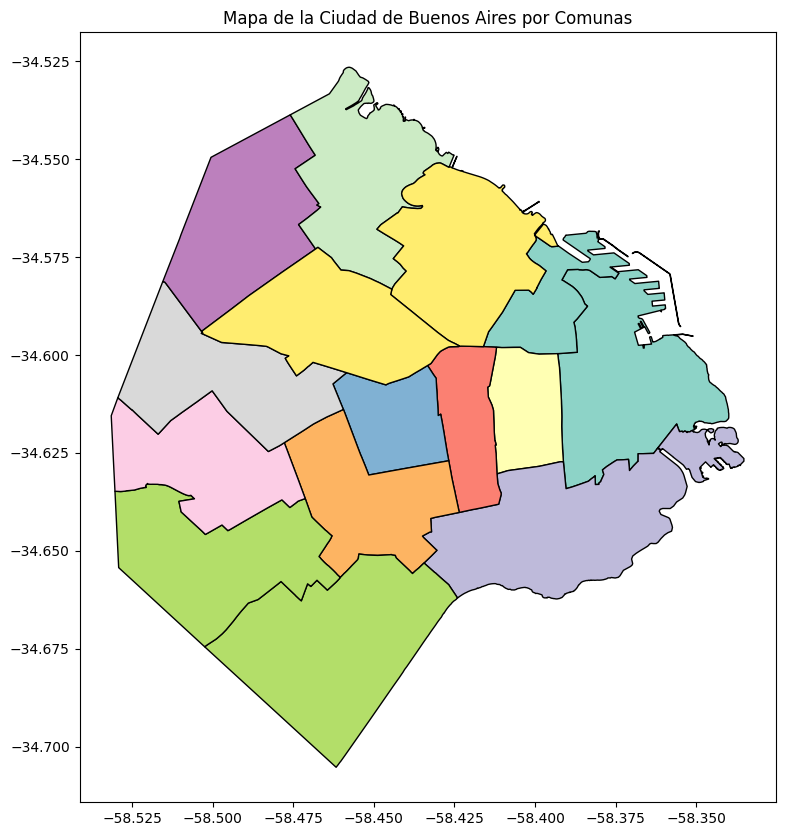

In [ ]:
import requests
import zipfile
import os
import geopandas as gpd
import matplotlib.pyplot as plt

url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/comunas/comunas.zip"

zip_file_path = "comunas_buenos_aires.zip"
extracted_folder = "comunas_buenos_aires"

# Descargar
response = requests.get(url)
with open(zip_file_path, "wb") as f:
    f.write(response.content)
print(f"Archivo descargado: {zip_file_path}")

# Descomprimir
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)
print(f"Archivos descomprimidos en: {extracted_folder}")

shapefile_path = os.path.join(extracted_folder, "comunas.shp")

# Cargar el shapefile
gdf = gpd.read_file(shapefile_path)

print(gdf.head())

# Visualizar el mapa
gdf.plot(cmap='Set3', edgecolor='black', figsize=(10, 10))
plt.title("Mapa de la Ciudad de Buenos Aires por Comunas")
plt.show()


In [ ]:
#hago un nuevo df agregándole al actual la columna de geometría para poder visualizar las comunas
df_merged = pd.merge(df, gdf[['comuna', 'geometry']], on='comuna', how='left')
df_merged = df_merged.rename(columns={'geometry': 'forma_comuna'})
print(df_merged.head())


   mes  dia      fecha  hora      tipo                        subtipo  \
0  NaN  LUN 2023-01-02    19  Vialidad  Muertes por siniestros viales   
1  NaN  MIE 2023-01-11    11  Vialidad  Muertes por siniestros viales   
2  NaN  VIE 2023-01-13     4  Vialidad  Muertes por siniestros viales   
3  NaN  VIE 2023-01-13     6  Vialidad  Muertes por siniestros viales   
4  NaN  VIE 2023-01-13     6  Vialidad  Muertes por siniestros viales   

  uso_arma uso_moto            barrio  comuna    latitud   longitud  \
0       NO       NO          BELGRANO      13 -58.445747 -34.559570   
1       NO       NO      VILLA LUGANO       8 -58.476557 -34.673096   
2       NO       NO          SAAVEDRA      12 -58.485670 -34.544011   
3       NO       NO  PARQUE CHACABUCO       7 -58.451874 -34.636364   
4       NO       NO  PARQUE CHACABUCO       7 -58.451874 -34.636364   

                                        forma_comuna  
0  POLYGON ((-58.45882 -34.53713, -58.45856 -34.5...  
1  POLYGON ((-58.44913 -

<ipython-input-144-05191a332f54>:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(df_comunas_merged.geometry.centroid.x, df_comunas_merged.geometry.centroid.y, df_comunas_merged['delitos']):


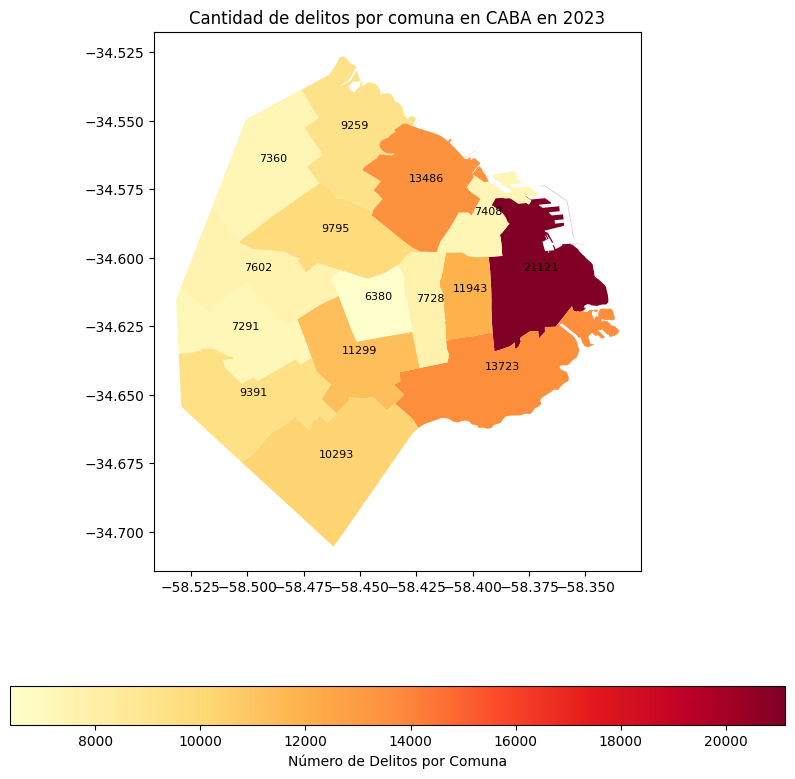

In [ ]:


delitos_por_comuna = df_merged.groupby('comuna').size().reset_index(name='delitos')


df_comunas_merged = gdf.merge(delitos_por_comuna, on='comuna', how='left')

# Visualizar el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
df_comunas_merged.plot(column='delitos', ax=ax, legend=True,
                       legend_kwds={'label': "Número de Delitos por Comuna",
                                    'orientation': "horizontal"},
                       cmap='YlOrRd')

# Agregar los números de delitos sobre cada comuna
for x, y, label in zip(df_comunas_merged.geometry.centroid.x, df_comunas_merged.geometry.centroid.y, df_comunas_merged['delitos']):
    ax.annotate(f'{label}', xy=(x, y), xytext=(3, 3), textcoords="offset points", ha='center', fontsize=8, color='black')


plt.title("Cantidad de delitos por comuna en CABA en 2023")
plt.show()

In [ ]:
mapa_dias = {
    'LUN': 'Día Hábil',
    'MAR': 'Día Hábil',
    'MIE': 'Día Hábil',
    'JUE': 'Día Hábil',
    'VIE': 'Día Hábil',
    'SAB': 'Fin de Semana',
    'DOM': 'Fin de Semana'
}

# Crear una nueva columna para días agrupados
df_merged['grupo_dia'] = df_merged['dia'].map(mapa_dias)

# Contar la cantidad de delitos por grupo
conteo_delitos = df_merged['grupo_dia'].value_counts()

# Mostrar resultados
print(conteo_delitos)


grupo_dia
Día Hábil        113257
Fin de Semana     40822
Name: count, dtype: int64


In [ ]:
def clasificar_horario(hora):
    if 0 <= hora <= 5:
        return 'madrugada'
    elif 6 <= hora <= 11:
        return 'mañana'
    elif 12 <= hora <= 16:
        return '1_tarde'
    elif 17 <= hora < 20:
        return '2_tarde'
    else:
        return 'noche'

df_merged['franja_horaria'] = df_merged['hora'].apply(clasificar_horario)
orden_franjas = ['mañana', '1_tarde', '2_tarde', 'noche', 'madrugada']
df_merged['franja_horaria'] = pd.Categorical(df_merged['franja_horaria'], categories=orden_franjas, ordered=True)


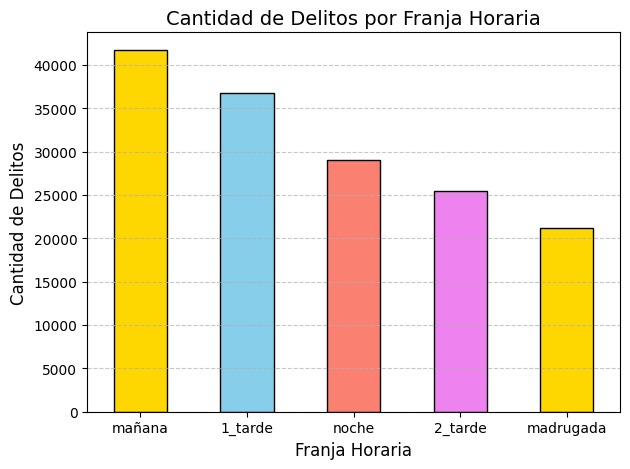

In [ ]:
conteo_franja_horaria = df_merged['franja_horaria'].value_counts()

conteo_franja_horaria.plot(kind='bar', color=['gold', 'skyblue', 'salmon', 'violet'], edgecolor='black')

plt.title('Cantidad de Delitos por Franja Horaria', fontsize=14)
plt.ylabel('Cantidad de Delitos', fontsize=12)
plt.xlabel('Franja Horaria', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

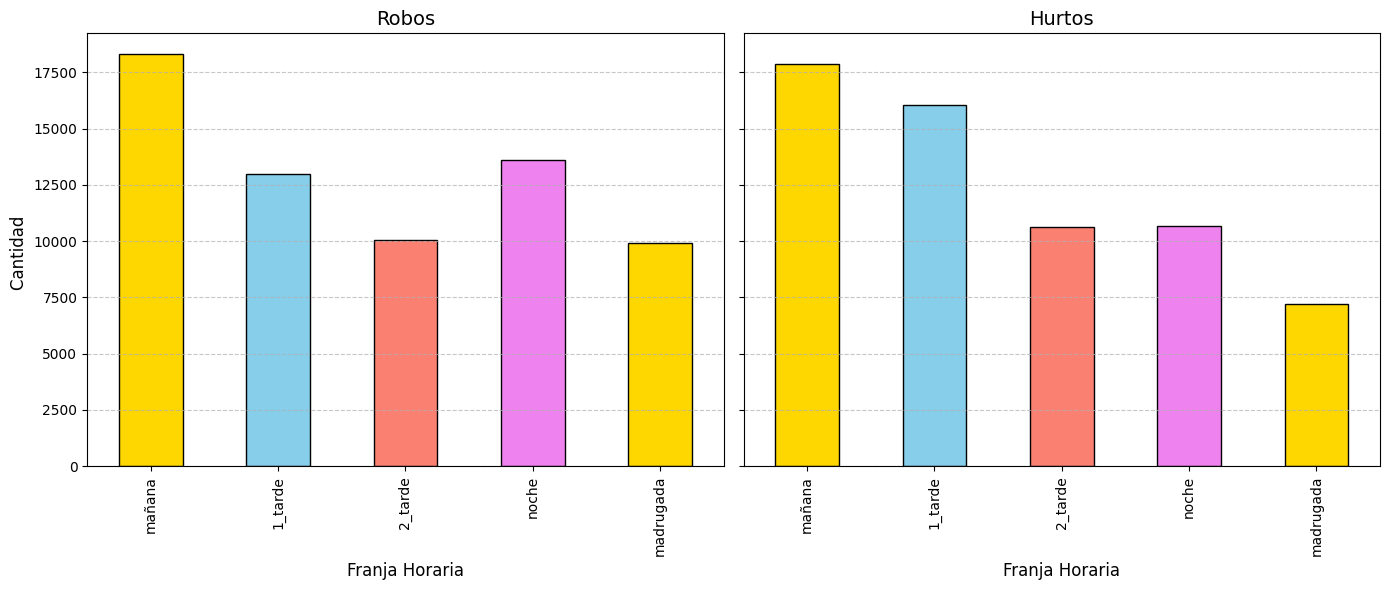

In [ ]:
df_robo = df_merged[df_merged['tipo'] == 'Robo']
df_hurto = df_merged[df_merged['tipo'] == 'Hurto']

conteo_franja_horaria_robo = df_robo['franja_horaria'].value_counts()
conteo_franja_horaria_hurto= df_hurto['franja_horaria'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

conteo_franja_horaria_robo.sort_index().plot(kind='bar', color=['gold', 'skyblue', 'salmon', 'violet'], edgecolor='black', ax=ax1)
ax1.set_title('Robos', fontsize=14)
ax1.set_xlabel('Franja Horaria', fontsize=12)
ax1.set_ylabel('Cantidad ', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

conteo_franja_horaria_hurto.sort_index().plot(kind='bar', color=['gold', 'skyblue', 'salmon', 'violet'], edgecolor='black', ax=ax2)
ax2.set_title('Hurtos', fontsize=14)
ax2.set_xlabel('Franja Horaria', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<ipython-input-90-255b0ed8ffac>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_delitos_por_franja_tipo = df_merged.groupby(['franja_horaria', 'tipo']).size().unstack(fill_value=0)


<Figure size 1400x700 with 0 Axes>

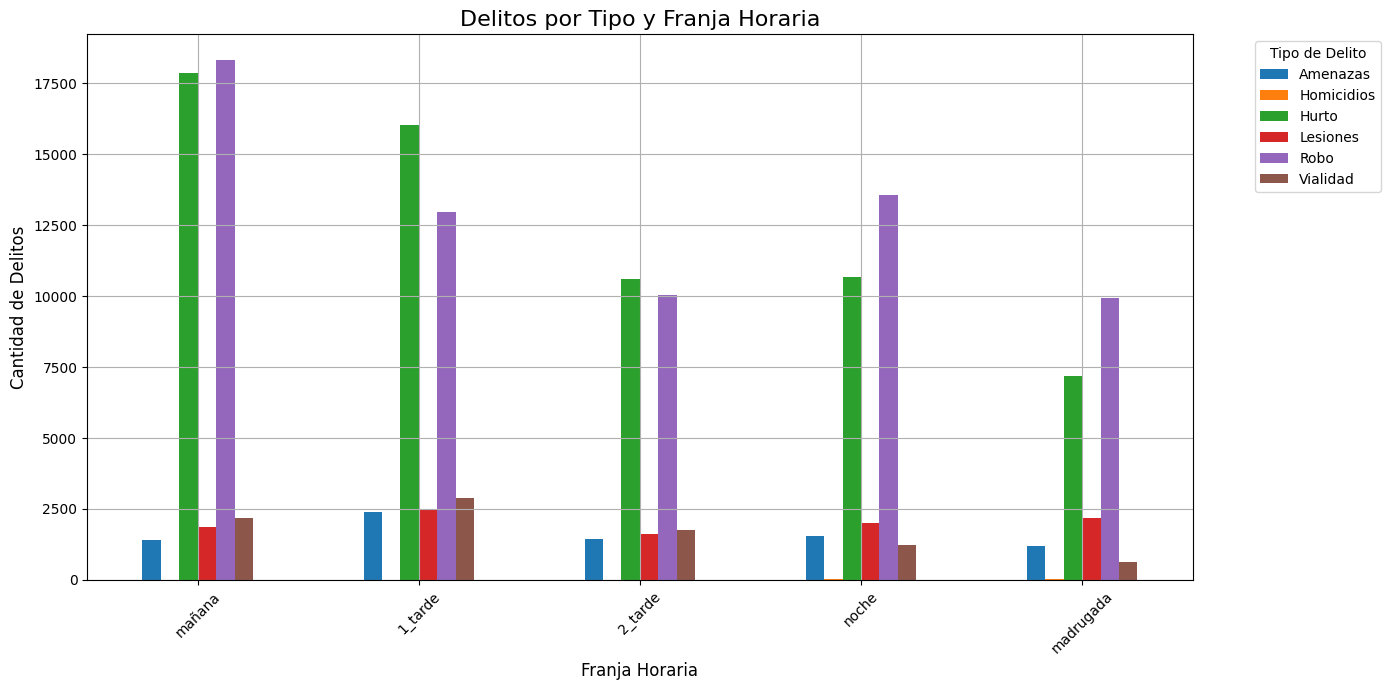

In [ ]:
conteo_delitos_por_franja_tipo = df_merged.groupby(['franja_horaria', 'tipo']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
conteo_delitos_por_franja_tipo.plot(kind='bar', stacked=False, figsize=(14, 7))

plt.title('Delitos por Tipo y Franja Horaria', fontsize=16)
plt.xlabel('Franja Horaria', fontsize=12)
plt.ylabel('Cantidad de Delitos', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Tipo de Delito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

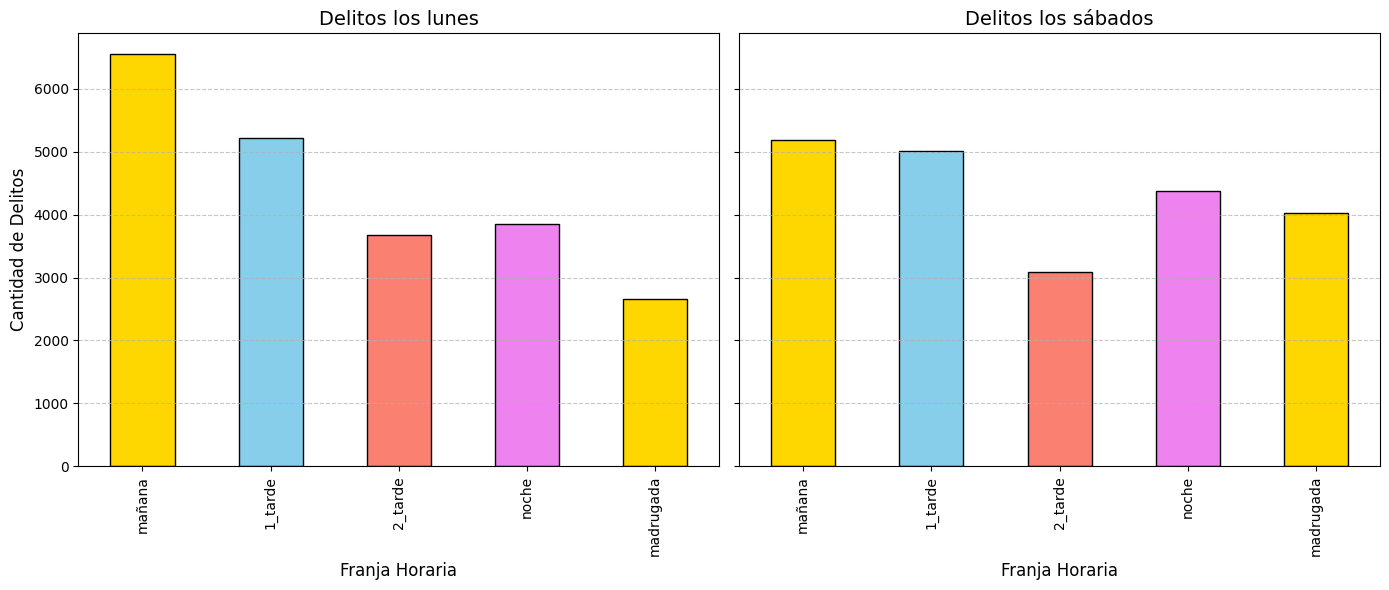

In [ ]:
df_martes = df_merged[df_merged['dia'] == 'LUN']
df_viernes = df_merged[df_merged['dia'] == 'SAB']

conteo_franja_horaria_martes = df_martes['franja_horaria'].value_counts()
conteo_franja_horaria_viernes = df_viernes['franja_horaria'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

conteo_franja_horaria_martes.sort_index().plot(kind='bar', color=['gold', 'skyblue', 'salmon', 'violet'], edgecolor='black', ax=ax1)
ax1.set_title('Delitos los lunes', fontsize=14)
ax1.set_xlabel('Franja Horaria', fontsize=12)
ax1.set_ylabel('Cantidad de Delitos', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

conteo_franja_horaria_viernes.sort_index().plot(kind='bar', color=['gold', 'skyblue', 'salmon', 'violet'], edgecolor='black', ax=ax2)
ax2.set_title('Delitos los sábados', fontsize=14)
ax2.set_xlabel('Franja Horaria', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Archivo descargado: barrios_buenos_aires.zip
Archivos descomprimidos en: barrios_buenos_aires
   id  objeto     nombre  comuna  perimetro_  area_metro  \
0   1  BARRIO  AGRONOMIA      15     6556.17  2122169.34   
1   2  BARRIO    ALMAGRO       5     8537.90  4050752.25   
2   3  BARRIO  BALVANERA       3     8375.82  4342280.27   
3   4  BARRIO   BARRACAS       4    12844.17  7954579.06   
4   5  BARRIO   BELGRANO      13    20443.29  8025458.65   

                                            geometry  
0  POLYGON ((-58.47589 -34.59172, -58.47598 -34.5...  
1  POLYGON ((-58.416 -34.59785, -58.41569 -34.597...  
2  POLYGON ((-58.39293 -34.59964, -58.39277 -34.6...  
3  POLYGON ((-58.37066 -34.62949, -58.37064 -34.6...  
4  POLYGON ((-58.45057 -34.53561, -58.45066 -34.5...  


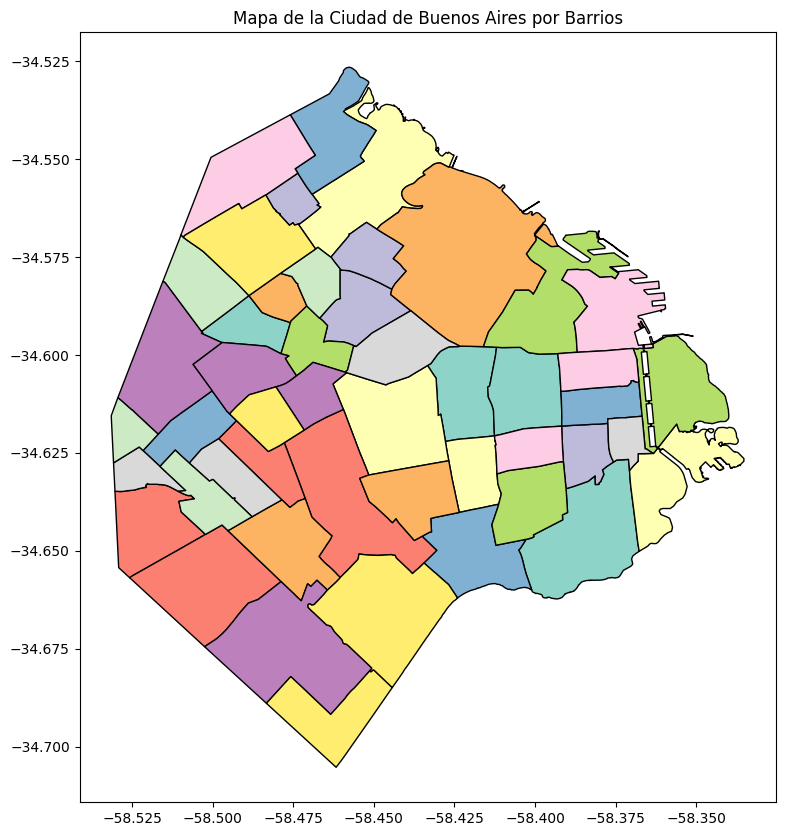

In [ ]:
# Agrego también la info de barrios para poder normalizar


url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.zip"

zip_file_path = "barrios_buenos_aires.zip"
extracted_folder = "barrios_buenos_aires"

response = requests.get(url)
with open(zip_file_path, "wb") as f:
    f.write(response.content)
print(f"Archivo descargado: {zip_file_path}")

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)
print(f"Archivos descomprimidos en: {extracted_folder}")

shapefile_path = os.path.join(extracted_folder, "barrios.shp")

barrios_caba = gpd.read_file(shapefile_path)

print(barrios_caba.head())

barrios_caba.plot(cmap='Set3', edgecolor='black', figsize=(10, 10))
plt.title("Mapa de la Ciudad de Buenos Aires por Barrios")
plt.show()


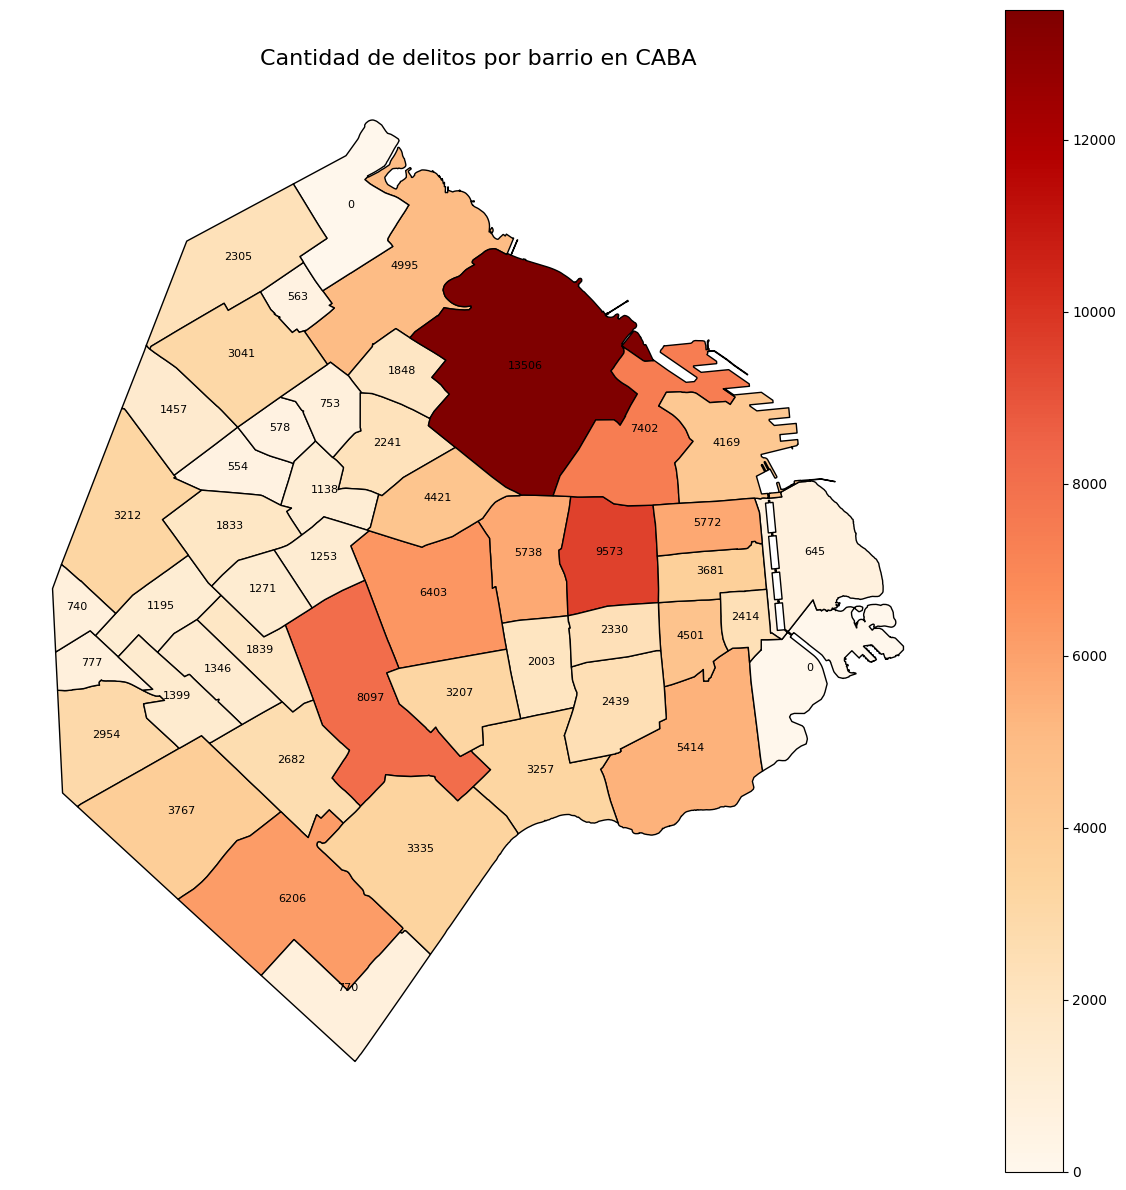

In [ ]:
delitos_por_barrio = df_delitos.groupby('barrio').size().reset_index(name='cantidad_delitos')

# Crear un nuevo GeoDataFrame con el merge
barrios_delitos = barrios_caba.merge(delitos_por_barrio, on='barrio', how='left')
barrios_delitos['cantidad_delitos'] = barrios_delitos['cantidad_delitos'].fillna(0)

# Crear el mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
barrios_delitos.plot(column='cantidad_delitos',
                     cmap='OrRd',
                     legend=True,
                     edgecolor='black',
                     ax=ax)

# Agregar el texto con la cantidad de delitos
for idx, row in barrios_delitos.iterrows():
    if row['geometry'].centroid.is_valid:  # Para evitar problemas con geometrías inválidas
        plt.text(row['geometry'].centroid.x,
                 row['geometry'].centroid.y,
                 str(int(row['cantidad_delitos'])),
                 fontsize=8,
                 ha='center',
                 color='black')

ax.set_title("Cantidad de delitos por barrio en CABA", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
barrios_caba = barrios_caba.rename(columns={'nombre': 'barrio'})

df_completo=pd.merge(df_merged, barrios_caba[['barrio', 'area_metro']], on='barrio', how='left')

In [ ]:
df_completo['barrio'].value_counts()

barrio
PALERMO                  13506
BALVANERA                 9573
FLORES                    8097
RECOLETA                  7402
CABALLITO                 6403
VILLA LUGANO              6206
SAN NICOLAS               5772
ALMAGRO                   5738
BARRACAS                  5414
BELGRANO                  4995
CONSTITUCION              4501
VILLA CRESPO              4421
RETIRO                    4169
MATADEROS                 3767
MONSERRAT                 3681
VILLA SOLDATI             3335
NUEVA POMPEYA             3257
VILLA DEVOTO              3212
PARQUE CHACABUCO          3207
VILLA URQUIZA             3041
LINIERS                   2954
PARQUE AVELLANEDA         2682
LA BOCA                   2625
PARQUE PATRICIOS          2439
NUNEZ                     2420
SAN TELMO                 2414
SAN CRISTOBAL             2330
SAAVEDRA                  2305
CHACARITA                 2241
BOEDO                     2003
COLEGIALES                1848
FLORESTA                  1839
VILLA DEL PARQUE          1833
VILLA PUEYRREDON          1457
VILLA LURO                1399
VELEZ SARSFIELD           1346
VILLA SANTA RITA          1271
VILLA GRAL. MITRE         1253
MONTE CASTRO              1195
PATERNAL                  1138
VERSALLES                  777
VILLA RIACHUELO            770
VILLA ORTUZAR              753
VILLA REAL                 740
PUERTO MADERO              645
PARQUE CHAS                578
COGHLAN                    563
AGRONOMIA                  554
GREGORIO DE LAFERRERE        2
FLORIDA                      2
BERNAL                       1
DOCK SUD                     1
SANTA MARÍA                  1
BANFIELD OESTE               1
VILLA LUZURIAGA              1
CASEROS                      1
Name: count, dtype: int64

In [ ]:
# Contar los delitos por barrio
delitos_por_barrio = df_completo.groupby('barrio').size().reset_index(name='delitos')

# Unir el conteo con el área de los barrios
df_completo = pd.merge(df_completo, delitos_por_barrio, on='barrio', how='left')


In [ ]:
delitos_normalizados = df_completo.groupby('barrio').agg(
    delitos_normalizados=('delitos', 'first'),  # Tomamos el valor de delitos por barrio (ya sumado)
    area_metro=('area_metro', 'first')  # Tomamos el área de cada barrio
)

# Normalizar los delitos por el área
delitos_normalizados['delitos_normalizados'] = delitos_normalizados['delitos_normalizados'] / delitos_normalizados['area_metro']

# Ordenar los barrios por la densidad de delitos (delitos por metro cuadrado)
delitos_normalizados_sorted = delitos_normalizados.sort_values(by='delitos_normalizados', ascending=False)

# Mostrar los barrios con más delitos normalizados por área
print(delitos_normalizados_sorted[['delitos_normalizados']])
delitos_normalizados_sorted=delitos_normalizados_sorted.dropna()

                       delitos_normalizados
barrio                                     
SAN NICOLAS                        0.002522
BALVANERA                          0.002205
CONSTITUCION                       0.002141
SAN TELMO                          0.001959
MONSERRAT                          0.001674
ALMAGRO                            0.001417
VILLA CRESPO                       0.001223
RECOLETA                           0.001172
SAN CRISTOBAL                      0.001140
FLORES                             0.000943
CABALLITO                          0.000935
RETIRO                             0.000924
PALERMO                            0.000852
PARQUE CHACABUCO                   0.000837
COLEGIALES                         0.000807
FLORESTA                           0.000792
BOEDO                              0.000767
CHACARITA                          0.000719
BARRACAS                           0.000681
LINIERS                            0.000675
VILLA LUGANO                    

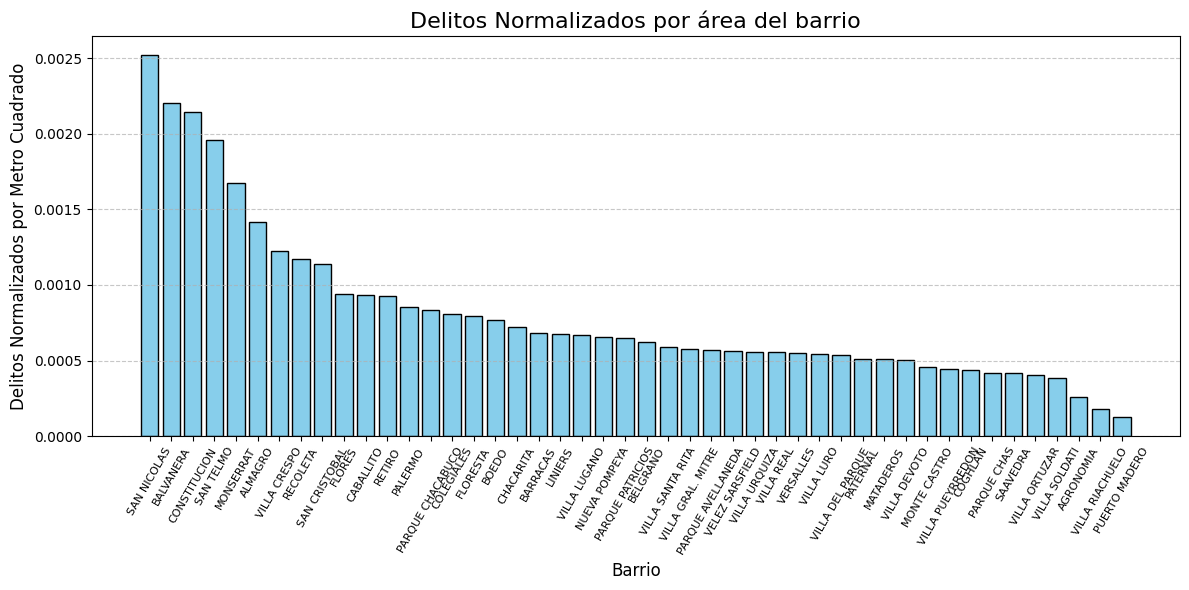

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(delitos_normalizados_sorted.index, delitos_normalizados_sorted['delitos_normalizados'], color='skyblue', edgecolor='black')

plt.title('Delitos Normalizados por área del barrio', fontsize=16)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Delitos Normalizados por Metro Cuadrado', fontsize=12)

plt.xticks(rotation=60, fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

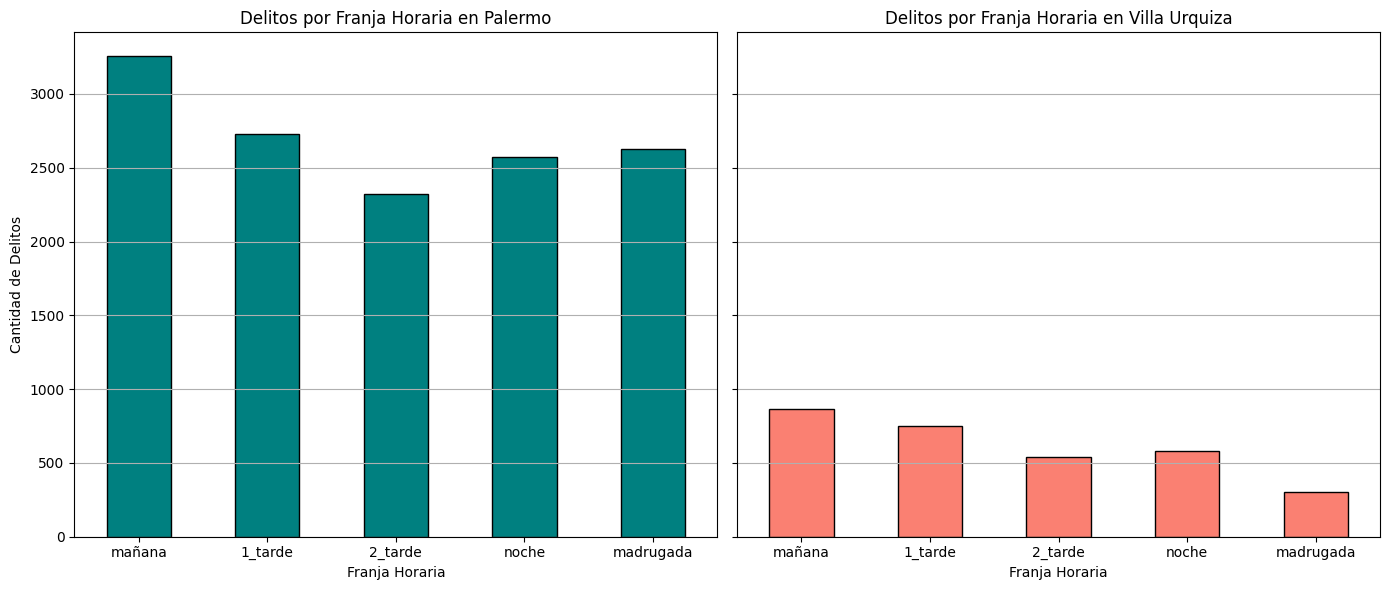

In [ ]:
df_palermo = df_completo[df_completo['barrio'] == 'PALERMO']
df_villa_urquiza = df_completo[df_completo['barrio'] == 'VILLA URQUIZA']

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

df_palermo['franja_horaria'].value_counts().sort_index().plot(
    kind='bar', color='teal', edgecolor='black', ax=axes[0])
axes[0].set_title('Delitos por Franja Horaria en Palermo')
axes[0].set_xlabel('Franja Horaria')
axes[0].set_ylabel('Cantidad de Delitos')
axes[0].grid(axis='y')
axes[0].tick_params(axis='x', rotation=0)

df_villa_urquiza['franja_horaria'].value_counts().sort_index().plot(
    kind='bar', color='salmon', edgecolor='black', ax=axes[1])
axes[1].set_title('Delitos por Franja Horaria en Villa Urquiza')
axes[1].set_xlabel('Franja Horaria')
axes[1].grid(axis='y')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

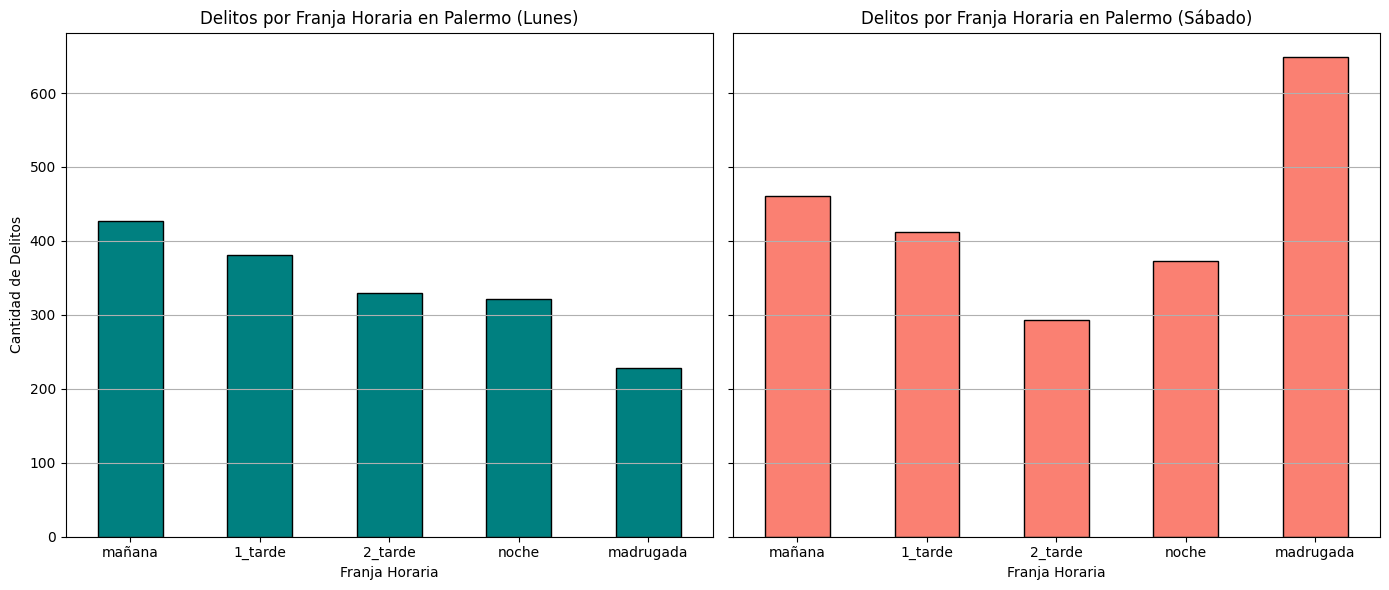

In [ ]:
df_palermo = df_completo[df_completo['barrio'] == 'PALERMO']
df_palermo_lunes = df_palermo[df_palermo['dia'] == 'LUN']
df_palermo_sabado = df_palermo[df_palermo['dia'] == 'SAB']
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)


df_palermo_lunes['franja_horaria'].value_counts().sort_index().plot(
    kind='bar', color='teal', edgecolor='black', ax=axes[0])
axes[0].set_title('Delitos por Franja Horaria en Palermo (Lunes)')
axes[0].set_xlabel('Franja Horaria')
axes[0].set_ylabel('Cantidad de Delitos')
axes[0].grid(axis='y')
axes[0].tick_params(axis='x', rotation=0)


df_palermo_sabado['franja_horaria'].value_counts().sort_index().plot(
    kind='bar', color='salmon', edgecolor='black', ax=axes[1])
axes[1].set_title('Delitos por Franja Horaria en Palermo (Sábado)')
axes[1].set_xlabel('Franja Horaria')
axes[1].grid(axis='y')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
madrugada_lunes = df_palermo_lunes['franja_horaria'].value_counts().get('madrugada', 0)
total_lunes = len(df_palermo_lunes)
porcentaje_madrugada_lunes = (madrugada_lunes / total_lunes) * 100

# Calcular el porcentaje de delitos en la madrugada para el sábado
madrugada_sabado = df_palermo_sabado['franja_horaria'].value_counts().get('madrugada', 0)
total_sabado = len(df_palermo_sabado)
porcentaje_madrugada_sabado = (madrugada_sabado / total_sabado) * 100

# Mostrar los resultados
print(f"Porcentaje de delitos en la madrugada (lunes): {porcentaje_madrugada_lunes:.2f}%")
print(f"Porcentaje de delitos en la madrugada (sábado): {porcentaje_madrugada_sabado:.2f}%")
print(f"Diferencia: +{porcentaje_madrugada_sabado-porcentaje_madrugada_lunes:.2f}%")

Porcentaje de delitos en la madrugada (lunes): 13.52%
Porcentaje de delitos en la madrugada (sábado): 29.66%
Diferencia: +16.15%


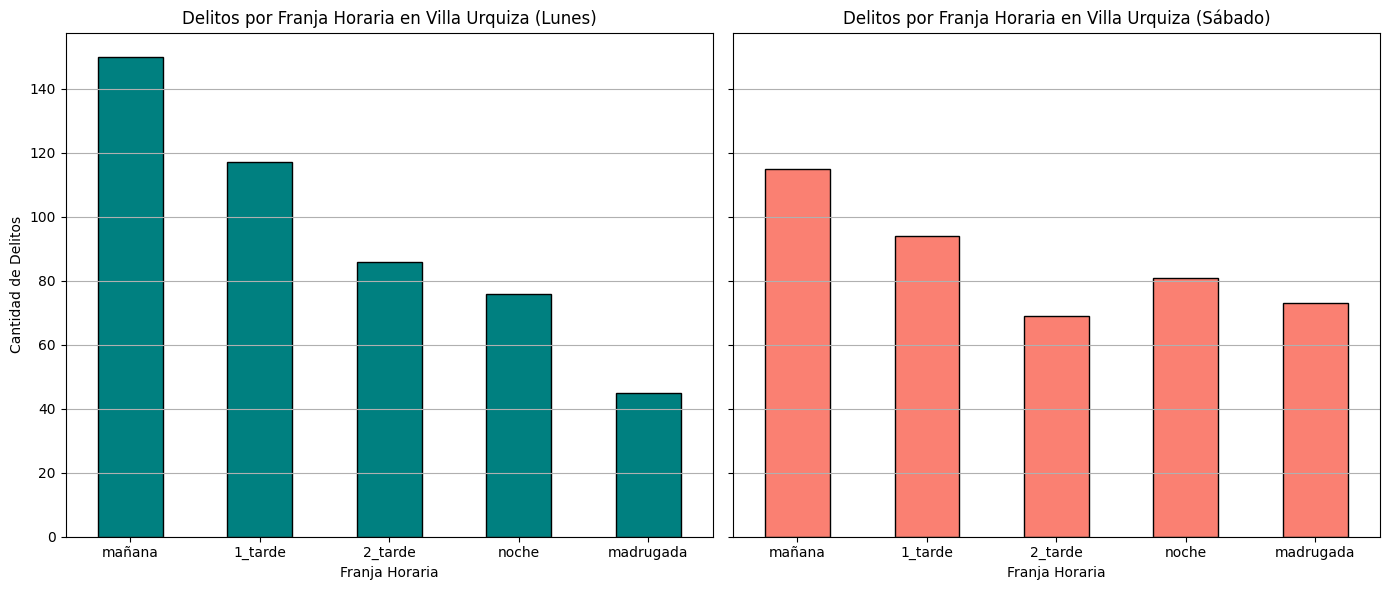

In [ ]:
df_urq = df_completo[df_completo['barrio'] == 'VILLA URQUIZA']
df_urq_lunes = df_urq[df_urq['dia'] == 'LUN']
df_urq_sabado = df_urq[df_urq['dia'] == 'SAB']

# Crear la figura con subgráficos que comparten el eje Y
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Subgráfico para el lunes
df_urq_lunes['franja_horaria'].value_counts().sort_index().plot(
    kind='bar', color='teal', edgecolor='black', ax=axes[0])
axes[0].set_title('Delitos por Franja Horaria en Villa Urquiza (Lunes)')
axes[0].set_xlabel('Franja Horaria')
axes[0].set_ylabel('Cantidad de Delitos')
axes[0].grid(axis='y')
axes[0].tick_params(axis='x', rotation=0)

# Subgráfico para el sábado
df_urq_sabado['franja_horaria'].value_counts().sort_index().plot(
    kind='bar', color='salmon', edgecolor='black', ax=axes[1])
axes[1].set_title('Delitos por Franja Horaria en Villa Urquiza (Sábado)')
axes[1].set_xlabel('Franja Horaria')
axes[1].grid(axis='y')
axes[1].tick_params(axis='x', rotation=0)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
madrugada_lunes_urq = df_urq_lunes['franja_horaria'].value_counts().get('madrugada', 0)
total_lunes_urq = len(df_urq_lunes)
porcentaje_madrugada_lunes_urq = (madrugada_lunes_urq / total_lunes_urq) * 100

# Calcular el porcentaje de delitos en la madrugada para el sábado en Villa Urquiza
madrugada_sabado_urq = df_urq_sabado['franja_horaria'].value_counts().get('madrugada', 0)
total_sabado_urq = len(df_urq_sabado)
porcentaje_madrugada_sabado_urq = (madrugada_sabado_urq / total_sabado_urq) * 100

# Mostrar los resultados
print(f"Porcentaje de delitos en la madrugada (lunes, Villa Urquiza): {porcentaje_madrugada_lunes_urq:.2f}%")
print(f"Porcentaje de delitos en la madrugada (sábado, Villa Urquiza): {porcentaje_madrugada_sabado_urq:.2f}%")
print(f"Diferencia: +{porcentaje_madrugada_sabado_urq-porcentaje_madrugada_lunes_urq:.2f}%")

Porcentaje de delitos en la madrugada (lunes, Villa Urquiza): 9.49%
Porcentaje de delitos en la madrugada (sábado, Villa Urquiza): 16.90%
Diferencia: +7.40%
